# Data Wrangling and explorative data analysis

### Imports

In [350]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### CSV Import

In [351]:
source_path = Path('./data/clean/immoscout_v2.csv')
model_df = pd.read_csv(source_path)

In [352]:
model_df.head()

,Living space,Plot area,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
0,100.0,553.6,4.0,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.0,222.0,2.4,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,93.0,1781.6,2.0,0.163362,0.095877,0.001911,47.397416,8.043150,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,154.0,370.0,1.8,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142.0,584.0,0.0,0.333865,0.279276,0.145835,47.404870,8.052781,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### transformation

Die Features werden anhand folgender Kriterien transformiert:

linksschiefe Verteilung -> Quadratische transformation

rechtsschiefe Verteilung -> logarithmische oder Quadratwurzel Transformation


In [353]:
model_df.columns

Index(['Living space', 'Plot area', 'Floor', 'ForestDensityL',
       'ForestDensityM', 'ForestDensityS', 'Latitude', 'Longitude',
       'NoisePollutionRailwayL', 'NoisePollutionRailwayM',
       'NoisePollutionRailwayS', 'NoisePollutionRoadL', 'NoisePollutionRoadM',
       'NoisePollutionRoadS', 'PopulationDensityL', 'PopulationDensityM',
       'PopulationDensityS', 'RiversAndLakesL', 'RiversAndLakesM',
       'RiversAndLakesS', 'WorkplaceDensityL', 'WorkplaceDensityM',
       'WorkplaceDensityS', 'Zip', 'distanceToTrainStation',
       'gde_area_agriculture_percentage', 'gde_area_forest_percentage',
       'gde_area_nonproductive_percentage', 'gde_area_settlement_percentage',
       'gde_average_house_hold', 'gde_empty_apartments',
       'gde_foreigners_percentage', 'gde_new_homes_per_1000',
       'gde_politics_cvp', 'gde_politics_fdp', 'gde_politics_gps',
       'gde_politics_sp', 'gde_politics_svp', 'gde_pop_per_km2',
       'gde_population', 'gde_private_apartments', 'gde_soci

In [354]:
# add all columnnames with numeric dtype to a list
numeric_columns = model_df.select_dtypes(include=np.number).columns.tolist()
# create new df with only numeric columns
numeric_df = model_df[numeric_columns]
# drop all columnnames with 'type_' in it
numeric_df = numeric_df.drop(columns=[col for col in numeric_df.columns if 'type_' in col])

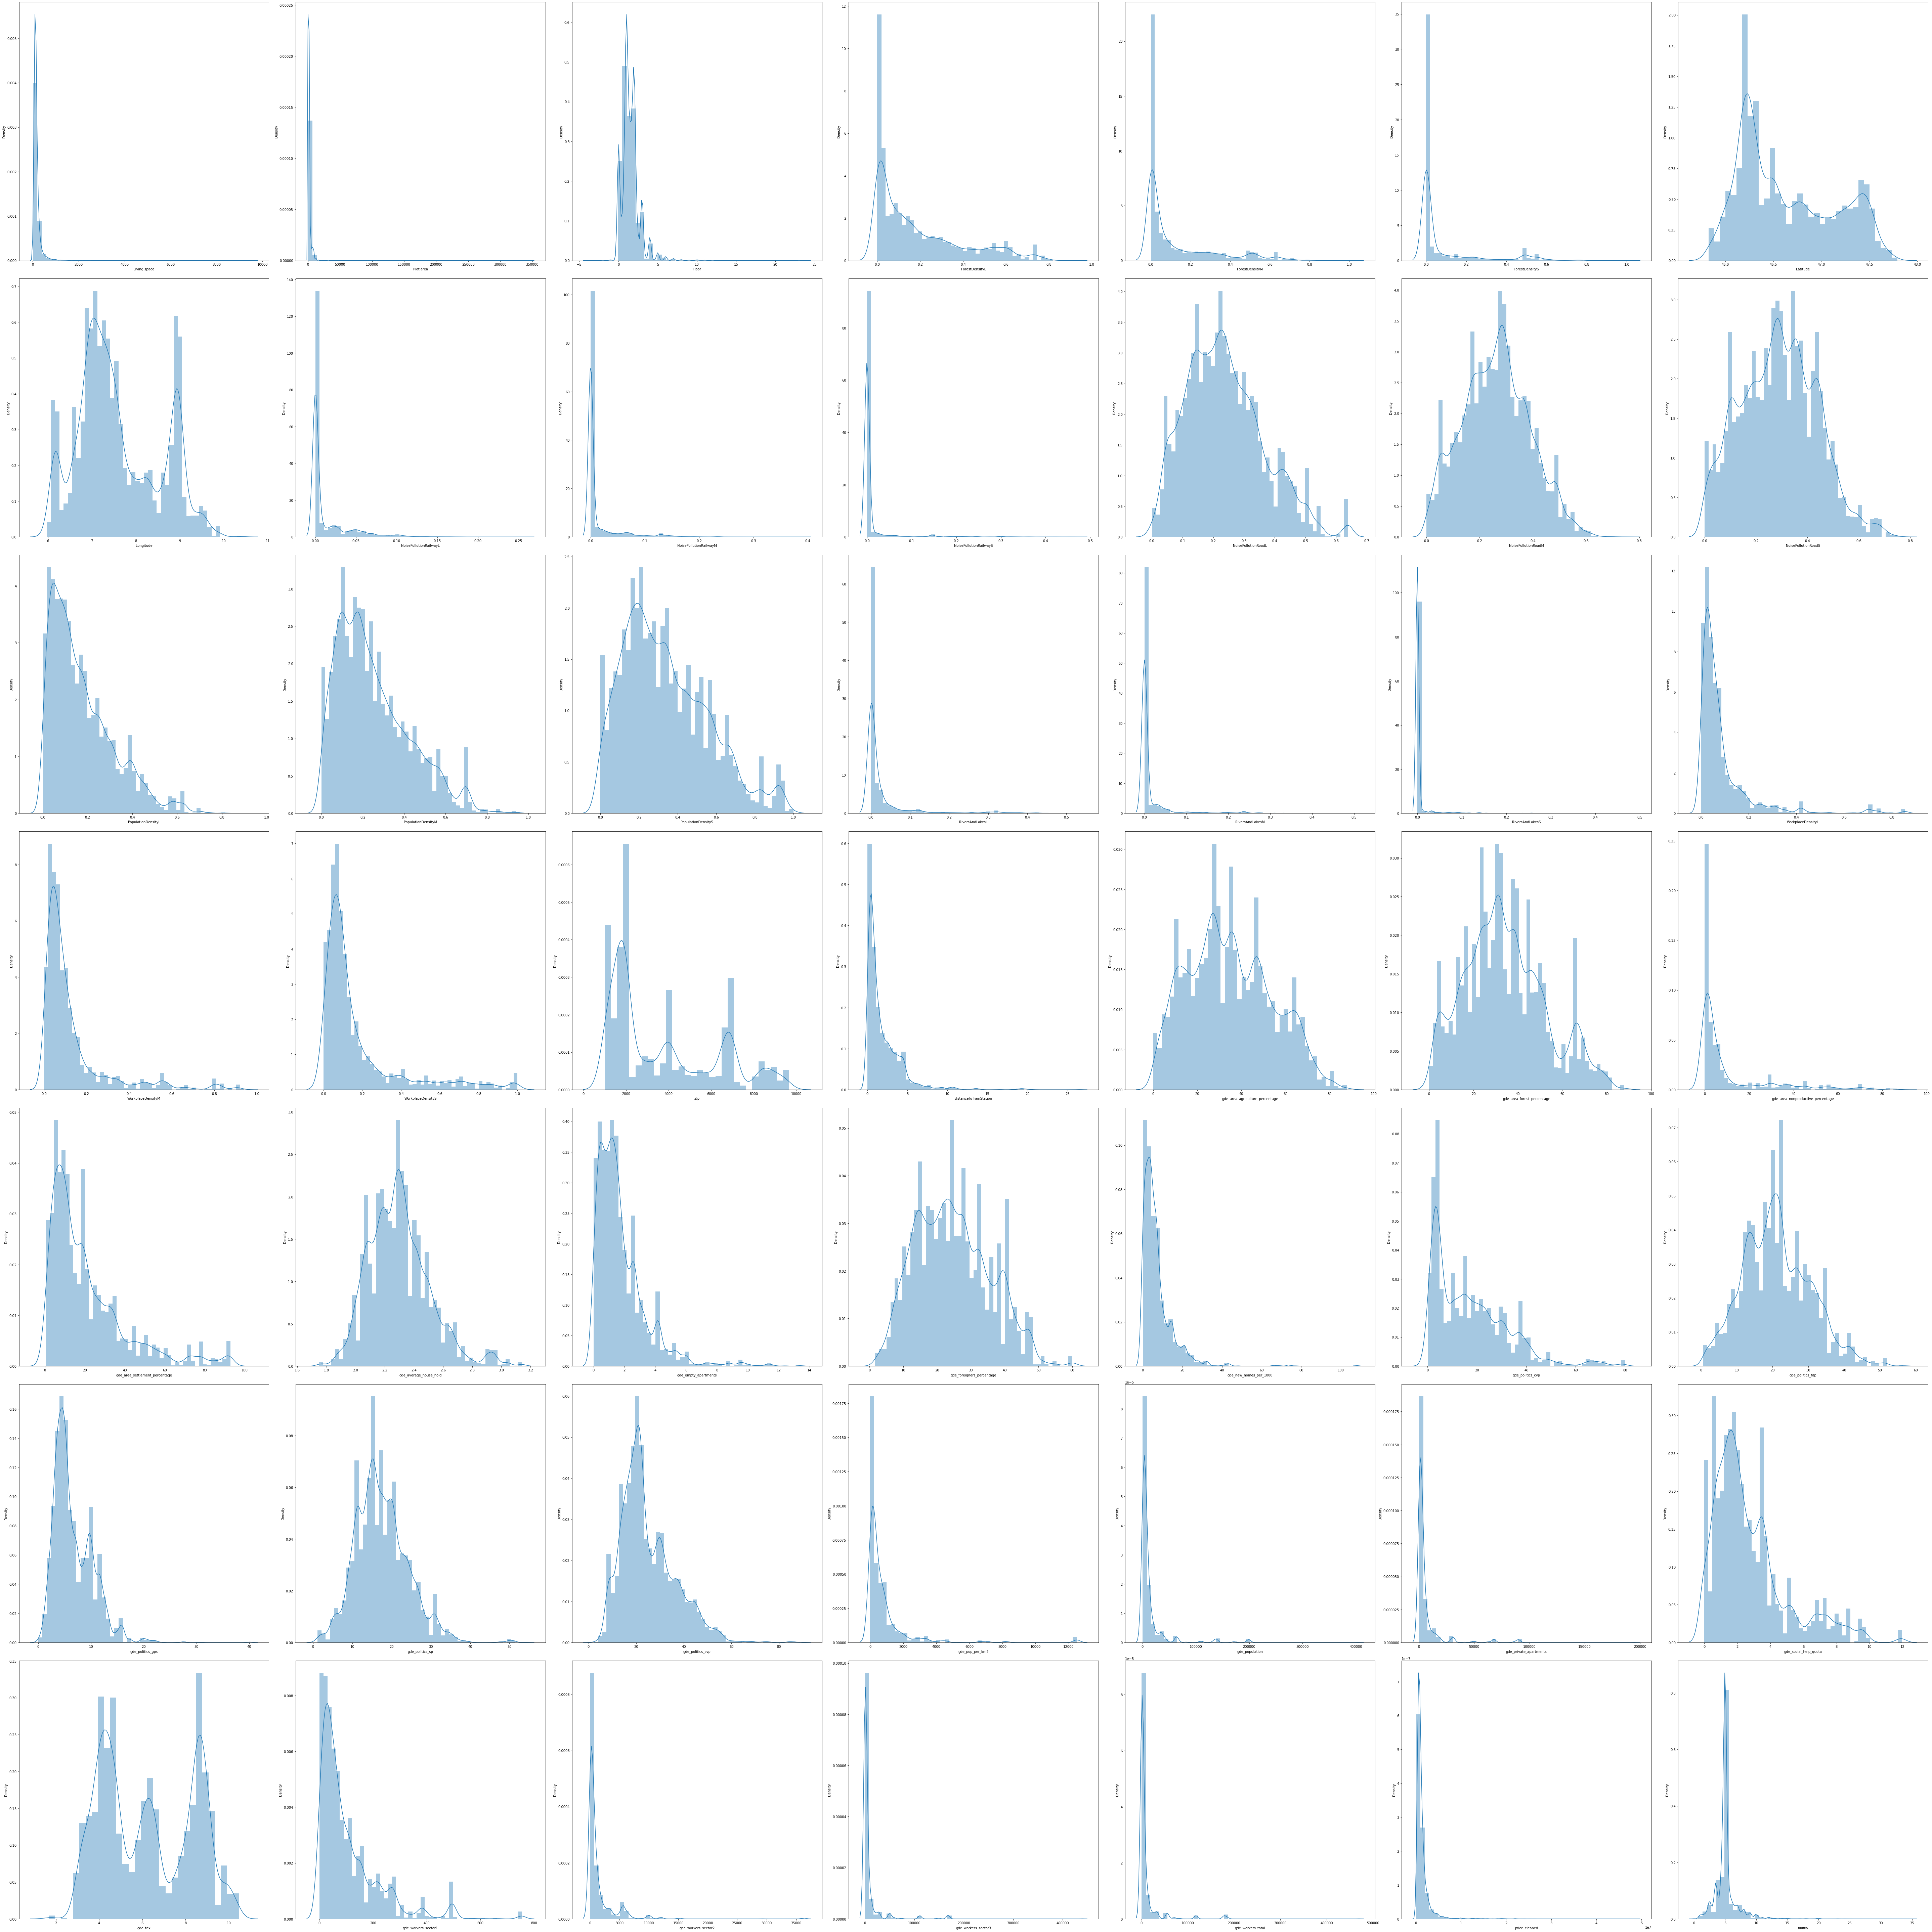

In [355]:
grid_number = int(len(numeric_df.columns)**0.5)

# Plotting the distribution of the data in a subplot
fig, axes = plt.subplots(nrows=grid_number, ncols=grid_number, figsize=(80, 80))
for i, ax in enumerate(axes.flatten()):
    sns.distplot(numeric_df.iloc[:, i], ax=ax)


plt.tight_layout()
plt.show()

In [356]:
index_rechtsschief = [3,8,9,10,14,15,17,18,20,21,22,23,27,28,30,32,33,38,39,41,43,44,49]

index_linksschief = []

In [357]:
# feature transformation


for feature in index_rechtsschief:
    model_df.iloc[:, feature] = (model_df.iloc[:, feature])**0.5

for feature in index_linksschief:
    model_df.iloc[:, feature] = (model_df.iloc[:, feature])**2


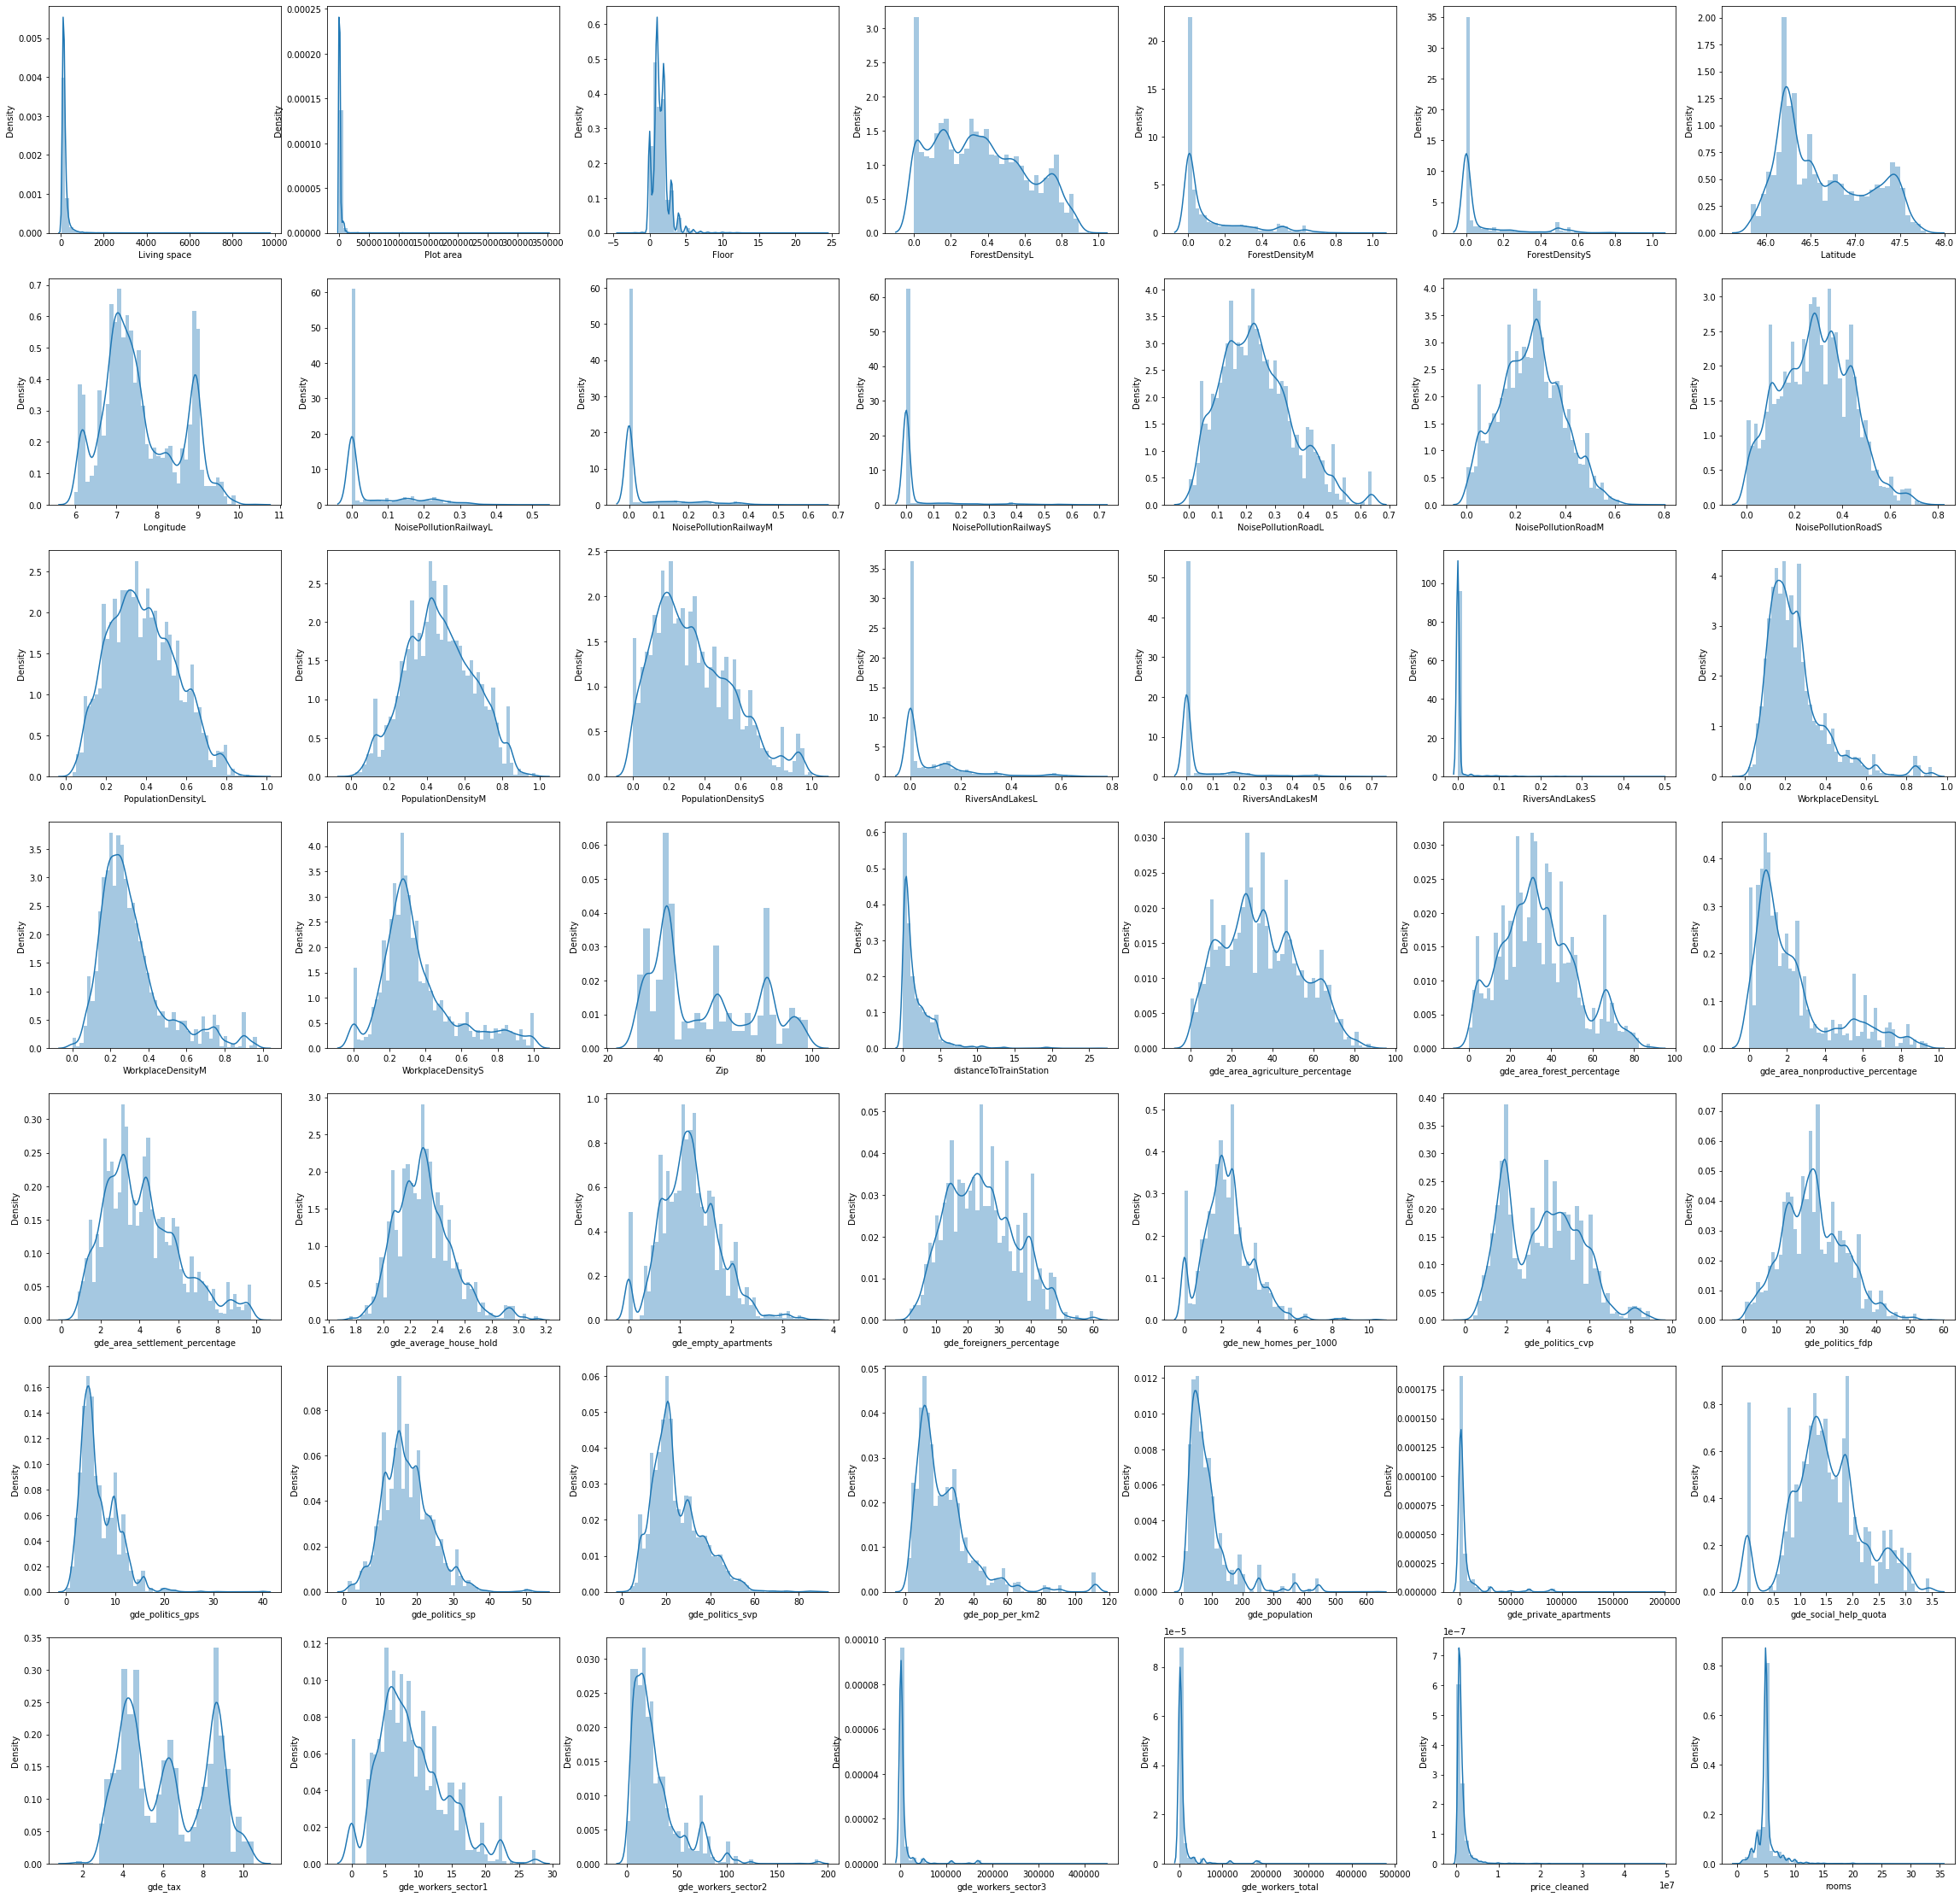

In [358]:
# Plotting the distribution of the transformed data in a subplot
fig, axes = plt.subplots(nrows=grid_number, ncols=grid_number, figsize=(40, 40))
for i, ax in enumerate(axes.flatten()):
    sns.distplot(model_df.iloc[:, i], ax=ax)


### Scaling

#### Min Max Scaling (prone to outliers)

In [359]:
model_df_min_max = model_df.copy()

for col in model_df_min_max.columns:
    if col == "price_cleaned":
        continue
    elif col.startswith("type_"):
        continue
    model_df_min_max[col] = (model_df_min_max[col] - model_df_min_max[col].min()) / (model_df_min_max[col].max() - model_df_min_max[col].min())

model_df_min_max.head()

,Living space,Plot area,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
0,0.009716,0.001532,0.285714,0.754914,0.286608,0.090908,0.808677,0.477811,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.015504,0.000587,0.228571,0.754914,0.286608,0.090908,0.808677,0.477811,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.008992,0.005032,0.214286,0.426764,0.095930,0.001911,0.799258,0.468164,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.015297,0.001009,0.207143,0.754914,0.286608,0.090908,0.808677,0.477811,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.014057,0.001619,0.142857,0.610095,0.279429,0.145835,0.803051,0.470341,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [360]:
model_df_min_max['price_cleaned']

0        1150000.0
1        1420000.0
2         720000.0
3        1430000.0
4         995000.0
           ...    
22386     475000.0
22387    1490000.0
22388    1450000.0
22389    1290000.0
22390     780000.0
Name: price_cleaned, Length: 22391, dtype: float64

#### Normalization (actually you change the distribution of your data)

In [361]:
model_df_norm = model_df.copy()

for col in model_df_norm.columns:
    if col == "price_cleaned":
        continue
    elif col.startswith("type_"):
        continue
    model_df_norm[col] = (model_df_norm[col] - model_df_norm[col].mean()) / (model_df_norm[col].max() - model_df_norm[col].min())


model_df_norm.head()

,Living space,Plot area,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
0,-0.008191,-0.003263,0.088753,0.374811,0.162345,0.011889,0.396179,0.114751,-0.122552,-0.078812,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.002403,-0.004208,0.031610,0.374811,0.162345,0.011889,0.396179,0.114751,-0.122552,-0.078812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.008915,0.000237,0.017325,0.046661,-0.028333,-0.077108,0.386760,0.105104,-0.122552,-0.078812,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.002610,-0.003786,0.010182,0.374811,0.162345,0.011889,0.396179,0.114751,-0.122552,-0.078812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.003850,-0.003176,-0.054104,0.229992,0.155166,0.066816,0.390553,0.107281,-0.122552,-0.078812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Standardization (best method to use if the deature is normally distributed)

In [362]:
model_df_std = model_df.copy()

for col in model_df_std.columns:
    if col == "price_cleaned":
        continue
    elif col.startswith("type_"):
        continue
    model_df_std[col] = (model_df_std[col] - model_df_std[col].mean()) / model_df_std[col].std()

model_df_std.head()

,Living space,Plot area,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
0,-0.307511,-0.256590,2.061284,1.461953,0.902849,0.072610,1.572826,0.556128,-0.648747,-0.488229,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.090218,-0.330900,0.734146,1.461953,0.902849,0.072610,1.572826,0.556128,-0.648747,-0.488229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.334672,0.018602,0.402361,0.182003,-0.157567,-0.470938,1.535434,0.509376,-0.648747,-0.488229,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.097978,-0.297734,0.236469,1.461953,0.902849,0.072610,1.572826,0.556128,-0.648747,-0.488229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.144541,-0.249777,-1.256561,0.897087,0.862926,0.408078,1.550492,0.519924,-0.648747,-0.488229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Robust Scaling (robust to outliers)

In [363]:
model_df_robust = model_df.copy()

for col in model_df_robust.columns:
    if col == "price_cleaned":
        continue
    elif col.startswith("type_"):
        continue

    model_df_robust[col] = (model_df_robust[col] - model_df_robust[col].median()) / (model_df_robust[col].quantile(0.75) - model_df_robust[col].quantile(0.25))

model_df_robust.head()

,Living space,Plot area,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
0,-0.347826,-0.367728,2.6,0.963285,1.344415,1.783030,1.102793,0.533433,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.260870,-0.683960,1.0,0.963285,1.344415,1.783030,1.102793,0.533433,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.423913,0.803357,0.6,0.167323,0.343605,0.037480,1.080554,0.502098,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.239130,-0.542819,0.4,0.963285,1.344415,1.783030,1.102793,0.533433,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.108696,-0.338737,-1.4,0.612012,1.306736,2.860354,1.089510,0.509167,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### column with power of 2-5

In [365]:
# add all columnnames with numeric dtype to a list
numeric_columns_min_max = model_df_min_max.select_dtypes(include=np.number).columns.tolist()

# create new df with only numeric columns
numeric_df_min_max = model_df_min_max[numeric_columns_min_max]
# drop all columnnames with 'type_' in it
numeric_df_min_max = numeric_df_min_max.drop(columns=[col for col in numeric_df_min_max.columns if 'type_' in col])
# new list with numeric columns without 'dummies'
numeric_columns_min_max = numeric_df_min_max.columns.tolist()
numeric_columns_min_max.remove('price_cleaned')

In [366]:
len(numeric_columns_min_max)

48

In [367]:
power = [i for i in range(2,6)]

# add for every numeric column a new column with the power of range(1,5)
for i in numeric_columns_min_max:
    for j in power:
        model_df_min_max[f'{i}_{j}'] = numeric_df_min_max[i]**j


In [368]:
numeric_columns_min_max

['Living space',
 'Plot area',
 'Floor',
 'ForestDensityL',
 'ForestDensityM',
 'ForestDensityS',
 'Latitude',
 'Longitude',
 'NoisePollutionRailwayL',
 'NoisePollutionRailwayM',
 'NoisePollutionRailwayS',
 'NoisePollutionRoadL',
 'NoisePollutionRoadM',
 'NoisePollutionRoadS',
 'PopulationDensityL',
 'PopulationDensityM',
 'PopulationDensityS',
 'RiversAndLakesL',
 'RiversAndLakesM',
 'RiversAndLakesS',
 'WorkplaceDensityL',
 'WorkplaceDensityM',
 'WorkplaceDensityS',
 'Zip',
 'distanceToTrainStation',
 'gde_area_agriculture_percentage',
 'gde_area_forest_percentage',
 'gde_area_nonproductive_percentage',
 'gde_area_settlement_percentage',
 'gde_average_house_hold',
 'gde_empty_apartments',
 'gde_foreigners_percentage',
 'gde_new_homes_per_1000',
 'gde_politics_cvp',
 'gde_politics_fdp',
 'gde_politics_gps',
 'gde_politics_sp',
 'gde_politics_svp',
 'gde_pop_per_km2',
 'gde_population',
 'gde_private_apartments',
 'gde_social_help_quota',
 'gde_tax',
 'gde_workers_sector1',
 'gde_worke

In [369]:
model_df_min_max.head()

,Living space,Plot area,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,gde_workers_sector3_4,gde_workers_sector3_5,gde_workers_total_2,gde_workers_total_3,gde_workers_total_4,gde_workers_total_5,rooms_2,rooms_3,rooms_4,rooms_5
0,0.009716,0.001532,0.285714,0.754914,0.286608,0.090908,0.808677,0.477811,0.0,0.0,...,2.204691e-13,1.510722e-16,4.489742e-07,3.008376e-10,2.015778e-13,1.350683e-16,0.020408,0.002915,0.000416,0.000059
1,0.015504,0.000587,0.228571,0.754914,0.286608,0.090908,0.808677,0.477811,0.0,0.0,...,2.204691e-13,1.510722e-16,4.489742e-07,3.008376e-10,2.015778e-13,1.350683e-16,0.020408,0.002915,0.000416,0.000059
2,0.008992,0.005032,0.214286,0.426764,0.095930,0.001911,0.799258,0.468164,0.0,0.0,...,2.280957e-05,1.576327e-06,5.103043e-03,3.645388e-04,2.604104e-05,1.860257e-06,0.020408,0.002915,0.000416,0.000059
3,0.015297,0.001009,0.207143,0.754914,0.286608,0.090908,0.808677,0.477811,0.0,0.0,...,2.204691e-13,1.510722e-16,4.489742e-07,3.008376e-10,2.015778e-13,1.350683e-16,0.020408,0.002915,0.000416,0.000059
4,0.014057,0.001619,0.142857,0.610095,0.279429,0.145835,0.803051,0.470341,0.0,0.0,...,2.043945e-11,4.345968e-14,8.152190e-06,2.327617e-08,6.645820e-11,1.897517e-13,0.020408,0.002915,0.000416,0.000059


### Export csv

In [ ]:
'''target_path = Path("./data/model/immoscout_min_max_v2.csv")
model_df_min_max.to_csv(target_path, index=False)'''

In [371]:
'''target_path = Path("./data/model/immoscout_norm.csv")
model_df_norm.to_csv(target_path, index=False)

target_path = Path("./data/model/immoscout_std.csv")
model_df_std.to_csv(target_path, index=False)

target_path = Path("./data/model/immoscout_robust.csv")
model_df_robust.to_csv(target_path, index=False)'''

'target_path = Path("./data/model/immoscout_std.csv")\nmodel_df_std.to_csv(target_path, index=False)\n\ntarget_path = Path("./data/model/immoscout_robust.csv")\nmodel_df_robust.to_csv(target_path, index=False)'